In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../experiments/sw-data/debug.csv')

df['time'] = df['time_alloc'] + df['time_parse'] + df['time_walk']
del df['bytes_out']
df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
df.sort_values(['max_values', 'throughput'], inplace=True)
display(df)

,framework,api,allocated,num_jsons,bytes_in,time_alloc,time_parse,time_walk,max_values,time,throughput
0,simdjson,DOM,False,47074,134220190,0.000027,9.510000e-07,3.189430e-01,NaN,0.318971,4.207918e+08
1,simdjson,DOM,True,47074,134220190,0.000154,7.000000e-07,2.596670e-01,NaN,0.259821,5.165865e+08
2,custom,NaN,True,47074,134220190,0.000128,1.377680e-01,4.000000e-08,NaN,0.137896,9.733444e+08


In [3]:
dg = df.groupby(['framework']).agg({'throughput':'max'})
dg.sort_values(by=['framework'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']

display(dg)


,Throughput (GB/s)
framework,
custom,0.973344
simdjson,0.516587


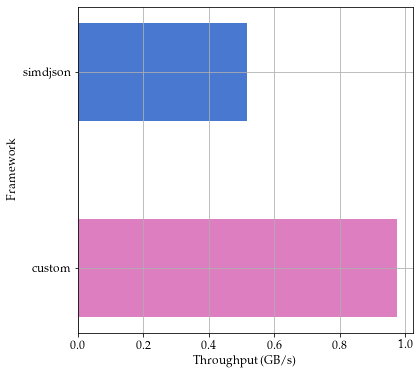

In [4]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

height = 1
rows = dg.size
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']
y_ticks = np.arange(0, rows)
y_labels = dg.index.to_list()


for i,f in enumerate(dg.index):
    b = ax.barh(y=i, height=1/rows, width=dg['Throughput (GB/s)'][f], color=colors[i])

ax.set_ylim(-0.33*height, rows-1+0.33*height)

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_ylabel('Framework')

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

fig.savefig('software.pdf')